# Johns Hopkins University COVID-19 data viewer
Reads the time series csv data available from here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

The CSV files:
 - time_series_covid19_confirmed_global.csv
 - time_series_covid19_deaths_global.csv
 - time_series_covid19_recovered_global.csv


Useful methods:
 - loadData(path = ''): parses the CSV files stored in the given location and generates dictionaries with the relevant time series. If no path is given it downloads the files into the current working directory
 and then reads them.
 - getData(country, province = ''): returns a self-explanatory dict with data for specified country and province
 - getCountries(): returns names of all contries on which there have data
 - getProvinces(country): returns names of provinces for given country
 - estimateTrueCases(country, province = '', fatalityRate = 0.01, timeToDeath = 17.3): returns estimate of true case count based on fatality rate and average time from infection to death (https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca) 
 - estimateGrowthRate(country, province, minCases = 50, averagingInterval = 1): Returns day-to-day changes in numbers of cases expressed as relative growth in percent. It can also calculate average
 growth rate over set ammonount of days (given by averagingInterval, needs to be integer)


In [26]:
import sys
import importlib

sys.path.append("/Users/karel/software/JHUreader/")
import readerJHU as reader
importlib.reload(reader)

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# download data and load it into the jhu, the csv files are saved in the current working directory
jhu = reader.CovidData()
jhu.loadData()

# to load  local data uncomment the lines below:
#path = '/your/path/to/the/csv/files/'
#jhu.loadData(path)

## Plot some data

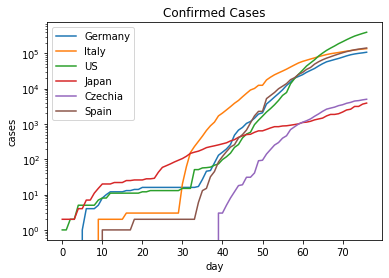

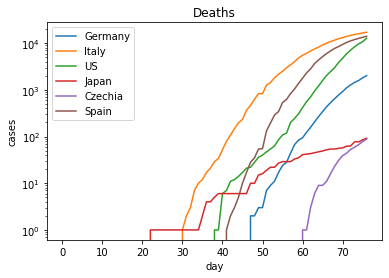

In [28]:
# plot confirmed cases for several countries
countries = ['Germany', 'Italy',  'US', 'Japan', 'Czechia', 'Spain']


for country in countries:
    data = jhu.getData(country)
    plt.semilogy(data['confirmed'], label = data['country'])

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('Confirmed Cases')
plt.show()

# plot numbers of dead for the same countries
for country in countries:
    data = jhu.getData(country)
    plt.semilogy(data['dead'], label = data['country'])

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('Deaths')
plt.show()

## True case estimate for the UK

Estimate true case count from the fatality count

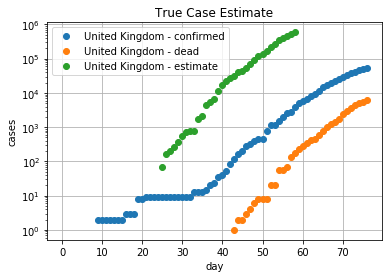

In [29]:
country = 'United Kingdom'
data = jhu.getData(country)
estimate = jhu.estimateTrueCases(country)

plt.semilogy(data['confirmed'],"o", label = data['country'] + ' - confirmed')
plt.semilogy(data['dead'],"o", label = data['country'] + ' - dead')
plt.semilogy(estimate['estimate'],"o", label = estimate['country'] + ' - estimate')

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('True Case Estimate')
plt.grid()
plt.show()


## Estimate of growth rate 

Let's plot the relative changes in numbers of cases/deaths from day to day. 
$$
\Delta_{rel}(d) = \left(\frac{N(d)}{N(d-1)} - 1 \right) \times 100
$$

$N(d)$ is number of cases on day $d$, $\Delta_{rel}(d)$ is the relative increase (in percent) of number of case from day $d-1$ to day $d$. This is a good parameter to describe an exponential growth.

In the example below one can see that Italy is getting the outbreak under control but UK and US still have quite a way to go.

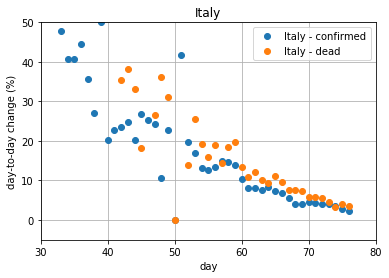

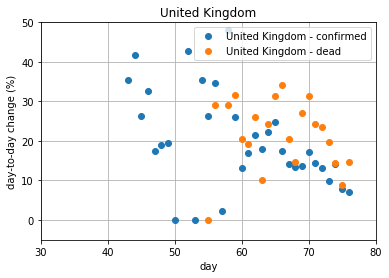

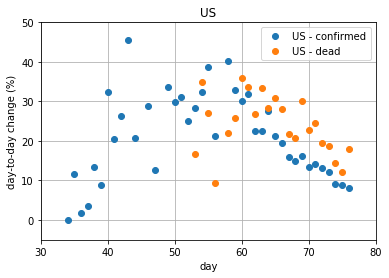

In [30]:
countries = [ 'Italy', 'United Kingdom', 'US']



for country in countries:
    gr = jhu.estimateGrowthRate(country)
    plt.plot(gr['days'], gr['confirmedRC'],"o", label = country + ' - confirmed')
    plt.plot(gr['days'], gr['deadRC'],"o", label = country + ' - dead')
    #plt.plot(gr['recoveredRC'],"o", label = data['country'] + ' - recovered')
    plt.ylim([-5,50])
    plt.xlim(30,80)
    plt.grid()
    plt.legend()
    plt.title(country)
    plt.xlabel('day')
    plt.ylabel('day-to-day change (%)')
    plt.show()

## Average growth rates
The above plots have quite a bit of scatter - let's look at average growth rates in the same contries but now averaged over the week preceeding the given day. (Note - of you try to do a moving arithmetic average of the data in the plots above, you will not get what is plotted below. Geometric averaging of day-to-day ratios is more appropriate. This is how the software does it. The average day-to-day ratio is then expressed as daily growth rate in percent.)

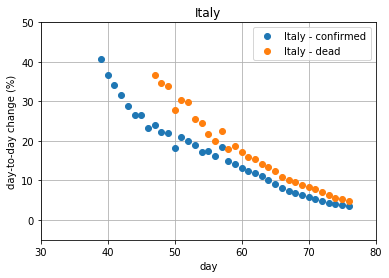

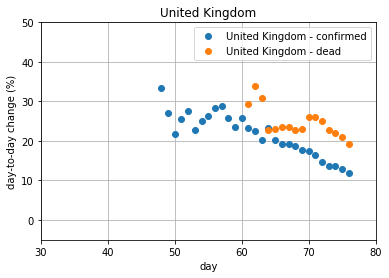

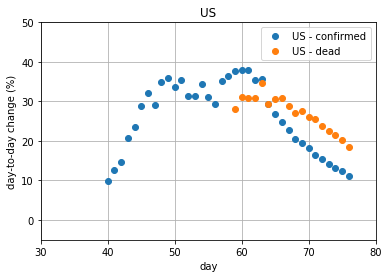

In [32]:
countries = [ 'Italy', 'United Kingdom', 'US']
averagingInterval = 7


for country in countries:
    gr = jhu.estimateGrowthRate(country, averagingInterval = averagingInterval)
    plt.plot(gr['days'], gr['confirmedRC'],"o", label = country + ' - confirmed')
    plt.plot(gr['days'], gr['deadRC'],"o", label = country + ' - dead')
    #plt.plot(gr['recoveredRC'],"o", label = data['country'] + ' - recovered')
    plt.ylim([-5,50])
    plt.xlim(30,80)
    plt.grid()
    plt.legend()
    plt.title(country)
    plt.xlabel('day')
    plt.ylabel('day-to-day change (%)')
    plt.show()

In [23]:
# have a look at data for one country
# similar dicts are generated by estimateTrueCases and estimateGrowthRate methods
data = jhu.getData('Spain')
for key in data.keys():
    print(key)
    print(data[key])
    print()

country
Spain

province


confirmed
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 13.0, 15.0, 32.0, 45.0, 84.0, 120.0, 165.0, 222.0, 259.0, 400.0, 500.0, 673.0, 1073.0, 1695.0, 2277.0, 2277.0, 5232.0, 6391.0, 7798.0, 9942.0, 11748.0, 13910.0, 17963.0, 20410.0, 25374.0, 28768.0, 35136.0, 39885.0, 49515.0, 57786.0, 65719.0, 73235.0, 80110.0, 87956.0, 95923.0, 104118.0, 112065.0, 119199.0, 126168.0, 131646.0, 136675.0]

dead
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 5.0, 10.0, 17.0, 28.0, 35.0, 54.0, 55.0, 133.0, 195.0, 289.0, 342.0, 533.0, 623.0, 830.0, 1043.0, 1375.0, 1772.0, 2311.0, 2808.0, 3647.0, 4365.0, 5138.0, 5982.0, 6803.0, 7716.0, 8464.0, 9387.0, 10348.0, 11198.0, 11947.0, 12

In [24]:
# available countries
print(jhu.getCountries())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [9]:
# provinces in China
print(jhu.getProvinces('China'))

['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']
